## Analyzing EV_A71's mugration model

Viet Nam is not showing up in the model. This is probably due to its altered name.

I will fix this tomorrow as it seems like a minor bug.

In [ ]:

import pandas as pd

In [ ]:
mugration_model = open("builds/original_enterovirus_a71/ev_a71/vp1/resultstraitscountry.mugration_model.txt")



In [2]:
with open('builds/original_enterovirus_a71/ev_a71/vp1/results/traitscountry.mugration_model.txt', 'r') as f:
    file_contents = f.readlines()
    f.close()

In [22]:
legend_countries = (file_contents[1:46])

country_legend = {}

for element in legend_countries:
    new_element = element.replace ("\t", "").replace("\n","")
    new_element = new_element.split(':')
    key, value = new_element[0], new_element[1]
    country_legend[key] = value

print(country_legend)

{'A': 'Australia', 'B': 'Austria', 'C': 'Azerbaijan', 'D': 'Brunei', 'E': 'Cambodia', 'F': 'Cameroon', 'G': 'Central African Republic', 'H': 'China', 'I': 'Croatia', 'J': 'Finland', 'K': 'France', 'L': 'Georgia', 'M': 'Germany', 'N': 'Guinea', 'O': 'Hong Kong', 'P': 'Hungary', 'Q': 'Iceland', 'R': 'India', 'S': 'Indonesia', 'T': 'Italy', 'U': 'Japan', 'V': 'Kazakhstan', 'W': 'Latvia', 'X': 'Madagascar', 'Y': 'Malaysia', 'Z': 'Mauritania', '[': 'Na', '\\': 'Netherlands', ']': 'Niger', '^': 'Norway', '_': 'Pakistan', '`': 'Peru', 'a': 'Philippines', 'b': 'Poland', 'c': 'Russia', 'd': 'Senegal', 'e': 'Singapore', 'f': 'South Korea', 'g': 'Spain', 'h': 'Taiwan', 'i': 'Thailand', 'j': 'Tunisia', 'k': 'United Kingdom', 'l': 'Usa', 'm': 'Viet Nam'}


In [7]:
equilibrium_list = (file_contents[52:97])
equilibrium_frequencies = {}

print(equilibrium_list)

for element in equilibrium_list:
    new_element = element.replace ("\n", "").replace(" ", "")
    new_element = new_element.split(':')
    key, value = new_element[0], new_element[1]
    equilibrium_frequencies[key] = value

['  A: 0.0214\n', '  B: 0.0261\n', '  C: 0.0258\n', '  D: 0.023\n', '  E: 0.0243\n', '  F: 0.0262\n', '  G: 0.026\n', '  H: 0.0163\n', '  I: 0.0258\n', '  J: 0.0246\n', '  K: 0.0143\n', '  L: 0.0263\n', '  M: 0.0187\n', '  N: 0.0256\n', '  O: 0.0128\n', '  P: 0.0259\n', '  Q: 0.0259\n', '  R: 0.0261\n', '  S: 0.0258\n', '  T: 0.0263\n', '  U: 0.0134\n', '  V: 0.025\n', '  W: 0.0259\n', '  X: 0.0257\n', '  Y: 0.0118\n', '  Z: 0.026\n', '  [: 0.0149\n', '  \\: 0.0096\n', '  ]: 0.0262\n', '  ^: 0.026\n', '  _: 0.026\n', '  `: 0.0258\n', '  a: 0.0237\n', '  b: 0.0235\n', '  c: 0.0156\n', '  d: 0.0262\n', '  e: 0.0243\n', '  f: 0.0232\n', '  g: 0.026\n', '  h: 0.0071\n', '  i: 0.0184\n', '  j: 0.0253\n', '  k: 0.026\n', '  l: 0.0231\n', '  m: 0.0141\n']


In [15]:
import pandas as pd 
dataframe = pd.read_csv('builds/original_enterovirus_a71/ev_a71/vp1/results/traitscountry.mugration_model.txt', skiprows=99, sep='\t')

pd.set_option("display.max_rows", None, "display.max_columns", None)

print(dataframe)

                        Unnamed: 0       A       B       C       D       E  \
0                                A       0  0.9439  0.9441  0.9433   0.944   
1                                B  0.9439       0  0.9444  0.9432  0.9441   
2                                C  0.9441  0.9444       0  0.9434  0.9443   
3                                D  0.9433  0.9432  0.9434       0  0.9433   
4                                E   0.944  0.9441  0.9443  0.9433       0   
5                                F  0.9464  0.9466  0.9469  0.9456  0.9464   
6                                G  0.9475  0.9475   0.948  0.9464  0.9472   
7                                H   0.859  0.8422  0.8433  0.8525  0.8484   
8                                I  0.9439  0.9441  0.9443  0.9432  0.9441   
9                                J  0.9434  0.9434  0.9437  0.9427  0.9434   
10                               K  0.9372  1.3977  0.9363  0.9362  0.9364   
11                               L   0.944  0.9442  0.9444  0.94

In [19]:
symmetrized_rates = ((dataframe.iloc[0:46]))
symmetrized_rates = symmetrized_rates.set_index('Unnamed: 0')
symmetrized_rates = symmetrized_rates.astype(float)



actual_rates = (dataframe.iloc[47:])
actual_rates = actual_rates.set_index('Unnamed: 0')
actual_rates = actual_rates.astype(float)

In [20]:
print(actual_rates)

                 A       B       C       D       E       F       G       H  \
Unnamed: 0                                                                   
  A         0.0000  0.0202  0.0202  0.0202  0.0202  0.0202  0.0203  0.0184   
  B         0.0246  0.0000  0.0246  0.0246  0.0246  0.0247  0.0247  0.0220   
  C         0.0243  0.0243  0.0000  0.0243  0.0243  0.0244  0.0244  0.0217   
  D         0.0217  0.0217  0.0217  0.0000  0.0217  0.0218  0.0218  0.0196   
  E         0.0229  0.0229  0.0229  0.0229  0.0000  0.0230  0.0230  0.0206   
  F         0.0248  0.0248  0.0248  0.0248  0.0248  0.0000  0.0306  0.0221   
  G         0.0247  0.0247  0.0247  0.0246  0.0247  0.0304  0.0000  0.0220   
  H         0.0140  0.0137  0.0138  0.0139  0.0138  0.0138  0.0138  0.0000   
  I         0.0244  0.0244  0.0244  0.0243  0.0244  0.0244  0.0245  0.0218   
  J         0.0232  0.0232  0.0232  0.0232  0.0232  0.0233  0.0233  0.0209   
  K         0.0134  0.0200  0.0134  0.0134  0.0134  0.0134  0.01

In [17]:
print(symmetrized_rates)

                                     A       B       C       D       E  \
Unnamed: 0                                                               
  A                             0.0000  0.9439  0.9441  0.9433  0.9440   
  B                             0.9439  0.0000  0.9444  0.9432  0.9441   
  C                             0.9441  0.9444  0.0000  0.9434  0.9443   
  D                             0.9433  0.9432  0.9434  0.0000  0.9433   
  E                             0.9440  0.9441  0.9443  0.9433  0.0000   
  F                             0.9464  0.9466  0.9469  0.9456  0.9464   
  G                             0.9475  0.9475  0.9480  0.9464  0.9472   
  H                             0.8590  0.8422  0.8433  0.8525  0.8484   
  I                             0.9439  0.9441  0.9443  0.9432  0.9441   
  J                             0.9434  0.9434  0.9437  0.9427  0.9434   
  K                             0.9372  1.3977  0.9363  0.9362  0.9364   
  L                             0.9440

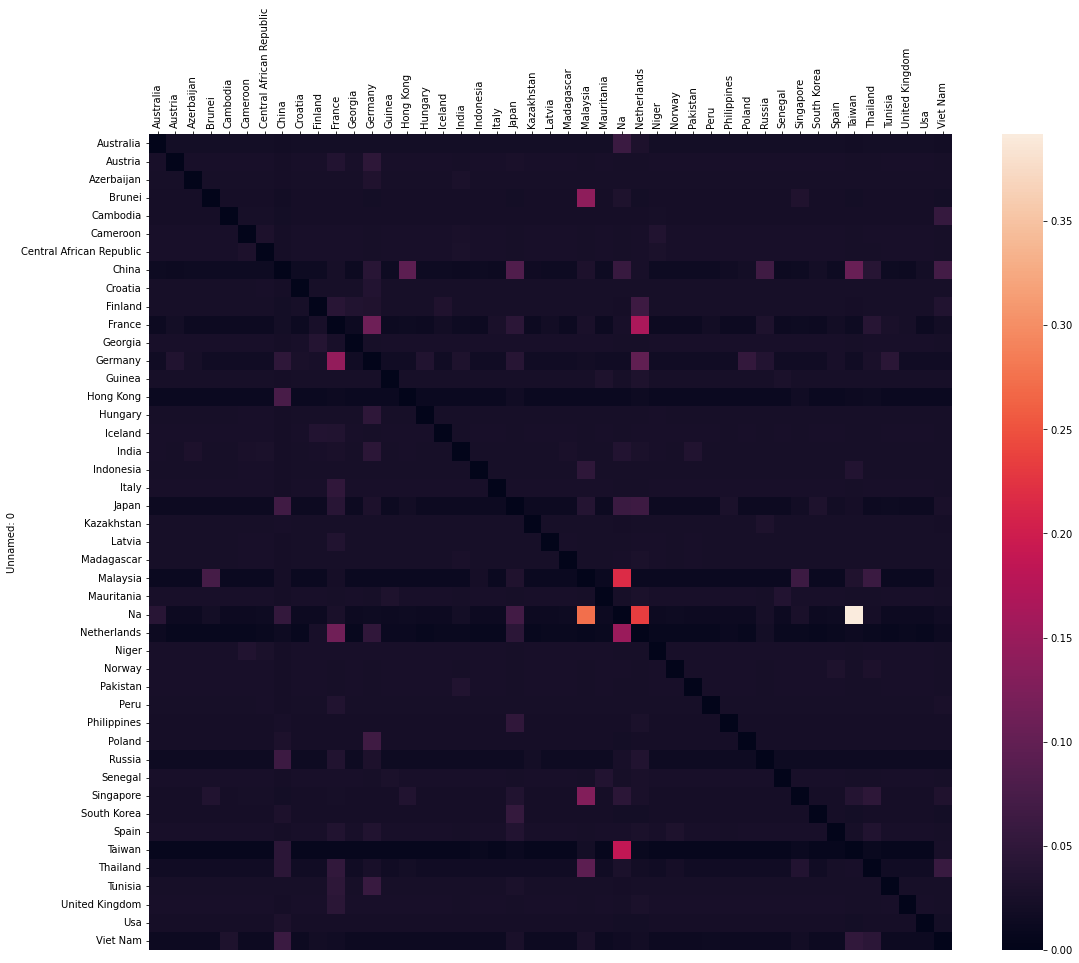

In [23]:
labels = country_legend.values()


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,15))
ax = sns.heatmap(actual_rates, xticklabels=labels, yticklabels=labels)
plt.tick_params(axis='x', labelbottom = False, bottom=False, top = True, labeltop=True, rotation=90)




In [ ]:

plt.figure(figsize=(18,15))
ax = sns.heatmap(symmetrized_rates, xticklabels=labels, yticklabels=labels)
plt.tick_params(axis='x', labelbottom = False, bottom=False, top = True, labeltop=True, rotation=90)




# Viet Nam is missing - Therefore plotting the same data, using my local vp1 build

Viet Nam is missing from the vp1 build used above. This is due to me trying to clean country names, which leads to an unresolved issue where Viet Nam is not being displayed on auspice and not being inferred by augur traits.

I'm trying to resolve this atm, but for now will display the same using an older build.

In [1]:
import pandas as pd

with open('subsamples/ev_a71/vp1_local/results/traitscountry.mugration_model.txt', 'r') as f:
    file_contents = f.readlines()
    f.close()
    
print(file_contents)

['Map from character to field name\n', 'A:\t\n', 'B:\tAustralia\n', 'C:\tAustria\n', 'D:\tAzerbaijan\n', 'E:\tBrunei\n', 'F:\tCambodia\n', 'G:\tCameroon\n', 'H:\tCentral_African_Republic\n', 'I:\tChina\n', 'J:\tCroatia\n', 'K:\tFinland\n', 'L:\tFrance\n', 'M:\tGeorgia\n', 'N:\tGermany\n', 'O:\tGuinea\n', 'P:\tHong_Kong\n', 'Q:\tHungary\n', 'R:\tIceland\n', 'S:\tIndia\n', 'T:\tIndonesia\n', 'U:\tItaly\n', 'V:\tJapan\n', 'W:\tKazakhstan\n', 'X:\tLatvia\n', 'Y:\tMadagascar\n', 'Z:\tMalaysia\n', '[:\tMauritania\n', '\\:\tNetherlands\n', ']:\tNiger\n', '^:\tNorway\n', '_:\tPakistan\n', '`:\tPeru\n', 'a:\tPhilippines\n', 'b:\tPoland\n', 'c:\tRussia\n', 'd:\tSenegal\n', 'e:\tSingapore\n', 'f:\tSouth_Korea\n', 'g:\tSpain\n', 'h:\tTaiwan\n', 'i:\tThailand\n', 'j:\tTunisia\n', 'k:\tUnited_Kingdom\n', 'l:\tViet_Nam\n', 'm:\t?\n', '\n', '\n', 'Substitution rate (mu): 11.127588\n', '\n', 'Equilibrium frequencies (pi_i):\n', '  A: 0.0109\n', '  B: 0.022\n', '  C: 0.026\n', '  D: 0.0267\n', '  E: 0.0

In [2]:
legend_countries = (file_contents[2:46])

country_legend = {}

for element in legend_countries:
    new_element = element.replace ("\t", "").replace("\n","")
    new_element = new_element.split(':')
    key, value = new_element[0], new_element[1]
    country_legend[key] = value

print(country_legend)

{'B': 'Australia', 'C': 'Austria', 'D': 'Azerbaijan', 'E': 'Brunei', 'F': 'Cambodia', 'G': 'Cameroon', 'H': 'Central_African_Republic', 'I': 'China', 'J': 'Croatia', 'K': 'Finland', 'L': 'France', 'M': 'Georgia', 'N': 'Germany', 'O': 'Guinea', 'P': 'Hong_Kong', 'Q': 'Hungary', 'R': 'Iceland', 'S': 'India', 'T': 'Indonesia', 'U': 'Italy', 'V': 'Japan', 'W': 'Kazakhstan', 'X': 'Latvia', 'Y': 'Madagascar', 'Z': 'Malaysia', '[': 'Mauritania', '\\': 'Netherlands', ']': 'Niger', '^': 'Norway', '_': 'Pakistan', '`': 'Peru', 'a': 'Philippines', 'b': 'Poland', 'c': 'Russia', 'd': 'Senegal', 'e': 'Singapore', 'f': 'South_Korea', 'g': 'Spain', 'h': 'Taiwan', 'i': 'Thailand', 'j': 'Tunisia', 'k': 'United_Kingdom', 'l': 'Viet_Nam', 'm': '?'}


In [3]:
equilibrium_list = (file_contents[51:94])
equilibrium_frequencies = {}



for element in equilibrium_list:
    new_element = element.replace ("\n", "").replace(" ", "")
    new_element = new_element.split(':')
    key, value = new_element[0], new_element[1]
    equilibrium_frequencies[key] = value
    



In [4]:
dataframe = pd.read_csv("subsamples/ev_a71/vp1_local/results/traitscountry.mugration_model.txt", skiprows=97, sep='\t')

print(dataframe)

   Unnamed: 0       A       B       C       D       E       F       G       H  \
0           A       0  3.2275  1.2199  0.9038  1.3552  0.9059    0.96  1.0099   
1           B  3.2275       0  0.9476  0.9474  0.9468  0.9473  0.9502  0.9513   
2           C  1.2199  0.9476       0  0.9478  0.9471  0.9477  0.9498  0.9505   
3           D  0.9038  0.9474  0.9478       0  0.9469  0.9476  0.9498  0.9504   
4           E  1.3552  0.9468  0.9471  0.9469       0  0.9468  0.9495  0.9503   
..        ...     ...     ...     ...     ...     ...     ...     ...     ...   
85          h  0.1747  0.0059  0.0058  0.0058  0.0058  0.0058  0.0058  0.0059   
86          i  0.0498  0.0176  0.0175  0.0175  0.0175  0.0175  0.0176  0.0176   
87          j  0.0237  0.0248  0.0248  0.0248  0.0248  0.0248  0.0249  0.0249   
88          k  0.0265  0.0259  0.0259  0.0259  0.0259  0.0259   0.026   0.026   
89          l  0.0274  0.0129  0.0142  0.0129  0.0129  0.0322  0.0129  0.0129   

         I  ...       c    

In [5]:
symmetrized_rates = ((dataframe.iloc[0:44]))
symmetrized_rates = symmetrized_rates.set_index('Unnamed: 0')
symmetrized_rates = symmetrized_rates.astype(float)

print(symmetrized_rates)



                  A       B       C       D       E       F       G       H  \
Unnamed: 0                                                                    
  A          0.0000  3.2275  1.2199  0.9038  1.3552  0.9059  0.9600  1.0099   
  B          3.2275  0.0000  0.9476  0.9474  0.9468  0.9473  0.9502  0.9513   
  C          1.2199  0.9476  0.0000  0.9478  0.9471  0.9477  0.9498  0.9505   
  D          0.9038  0.9474  0.9478  0.0000  0.9469  0.9476  0.9498  0.9504   
  E          1.3552  0.9468  0.9471  0.9469  0.0000  0.9468  0.9495  0.9503   
  F          0.9059  0.9473  0.9477  0.9476  0.9468  0.0000  0.9494  0.9499   
  G          0.9600  0.9502  0.9498  0.9498  0.9495  0.9494  0.0000  1.1712   
  H          1.0099  0.9513  0.9505  0.9504  0.9503  0.9499  1.1712  0.0000   
  I          5.4438  0.8353  0.8189  0.8147  0.8154  0.8216  0.8157  0.8181   
  J          0.9032  0.9473  0.9476  0.9476  0.9468  0.9474  0.9495  0.9501   
  K          2.2840  0.9467  0.9469  0.9466  0.9459 

In [6]:
actual_rates = (dataframe.iloc[46:])
actual_rates = actual_rates.set_index('Unnamed: 0')
actual_rates = actual_rates.astype(float)
print(actual_rates)

                 A       B       C       D       E       F       G       H  \
Unnamed: 0                                                                   
  A         0.0000  0.0352  0.0133  0.0099  0.0148  0.0099  0.0105  0.0110   
  B         0.0709  0.0000  0.0208  0.0208  0.0208  0.0208  0.0209  0.0209   
  C         0.0317  0.0246  0.0000  0.0246  0.0246  0.0246  0.0247  0.0247   
  D         0.0241  0.0253  0.0253  0.0000  0.0253  0.0253  0.0254  0.0254   
  E         0.0358  0.0250  0.0250  0.0250  0.0000  0.0250  0.0251  0.0251   
  F         0.0227  0.0238  0.0238  0.0238  0.0237  0.0000  0.0238  0.0238   
  G         0.0259  0.0257  0.0256  0.0256  0.0256  0.0256  0.0000  0.0316   
  H         0.0270  0.0254  0.0254  0.0254  0.0254  0.0254  0.0313  0.0000   
  I         0.0828  0.0127  0.0124  0.0124  0.0124  0.0125  0.0124  0.0124   
  J         0.0241  0.0253  0.0253  0.0253  0.0253  0.0253  0.0254  0.0254   
  K         0.0576  0.0239  0.0239  0.0239  0.0238  0.0238  0.02

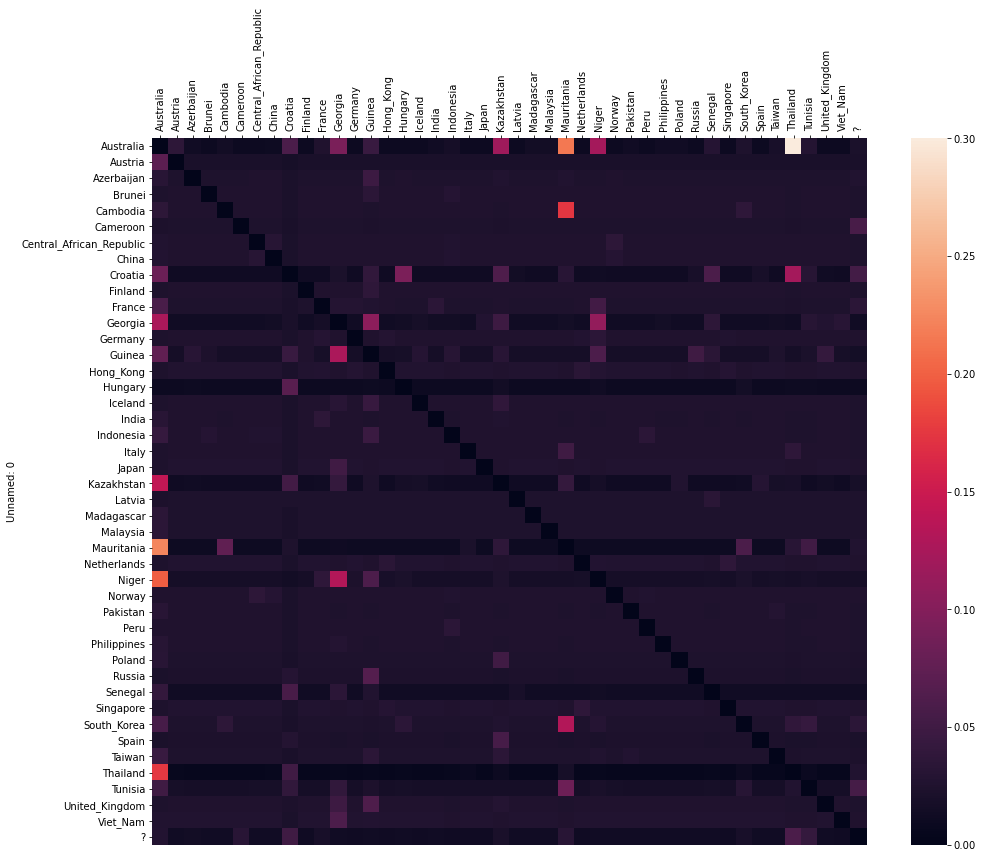

In [22]:
labels = country_legend.values()


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,13))
ax = sns.heatmap(actual_rates, xticklabels=labels, yticklabels=labels)
plt.tick_params(axis='x', labelbottom = False, bottom=False, top = True, labeltop=True, rotation=90)




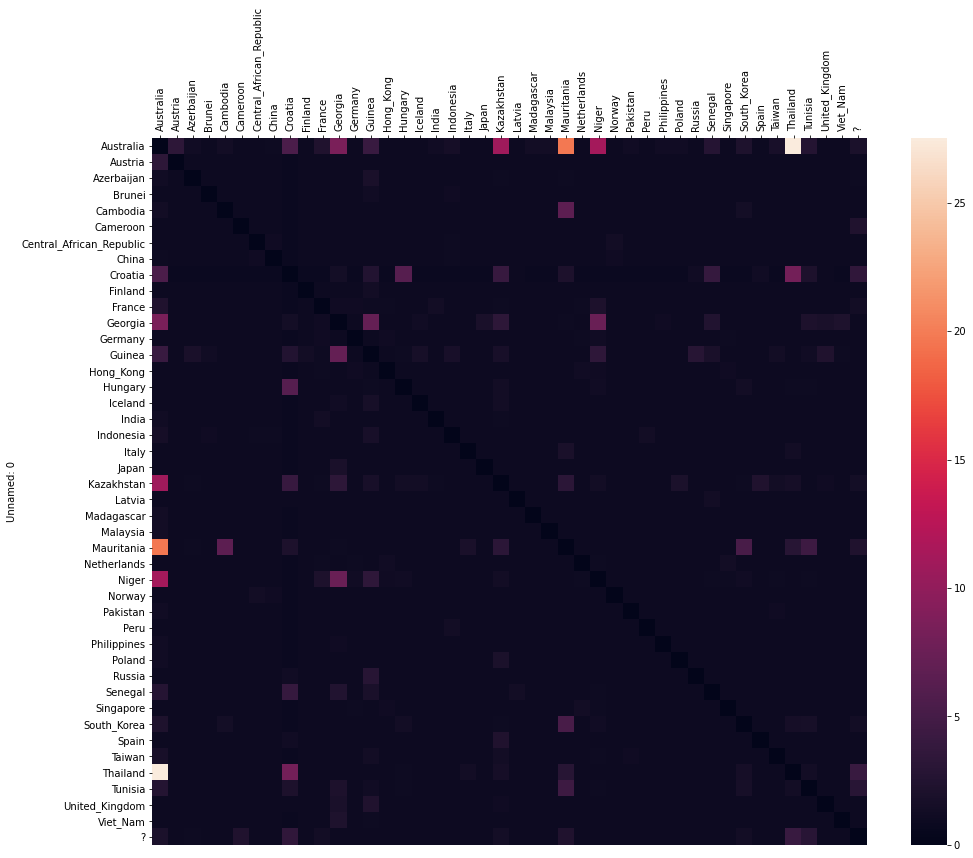

In [23]:

plt.figure(figsize=(16,13))
ax = sns.heatmap(symmetrized_rates, xticklabels=labels, yticklabels=labels)
plt.tick_params(axis='x', labelbottom = False, bottom=False, top = True, labeltop=True, rotation=90)


